### Probablistic load flow analysis

    Deterministic load flow analysis used to analyze and assess the planning and operating of power system on a daily routine.
    DLF uses specific values of power generations and load demands of a selected network configuration to calcualte system states and power flow in transmission lines.
    Hence DLF ignores the uncertanity in power system such as generation uncertanity, load uncertanity or risk of transmission line failure and so on. 
    To consider the uncertanities and handeling the risk associated with it, possibly, Probablistic load flow has been proposed. 
    Part of Stochastic Security Analysis
    First propsed on 1974.
    PLF requries the input in terms of PDF or CDF so that the system uncertanities could be understood or modelled. 
    There are generally two ways to perfrom PLF, one is anlaytical method and another is simulation approach (there are approximation methods too, however, these two are popular.)


### Probablistic modelling of load or generation

    As we know, the PLF take the input in the form of pdf and cdf. 
    Hence, we can model system loads or generation in terms of density function.

#### Random Variable and its distribution

    An outcome of random experiment described by numercial data 
    Data colledtec from either experiment or measurement to be analysed or model statistically in terms of probablity functions
    Consider an example: the load pattern of Ithari 




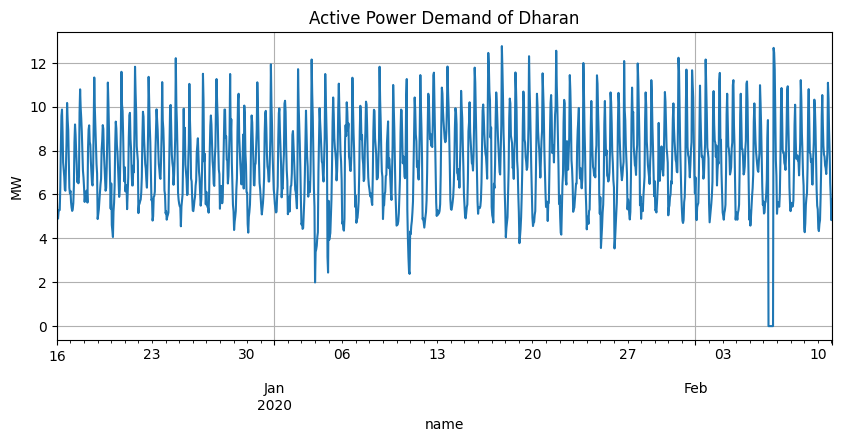

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

load_data = pd.read_csv("https://raw.githubusercontent.com/deependran7/grid_optimization/refs/heads/main/Data_Folder/Eastern_grid_data/dry_season_data/loads-p_set.csv")
load_data['name'] = pd.to_datetime(load_data['name'])
load_data = load_data.set_index(['name'])

fig, ax = plt.subplots(figsize=(10, 4))
load_data['DHARAN'].plot(ax=ax)
ax.set_title('Active Power Demand of Dharan')
ax.set_ylabel('MW')
ax.grid(True)

Now as we see the distribution pattern of Ithari load is random, however it can be fitted to some distribution function that represent its distribution function.

For observing the pattern first we plot the histogram of the data and try to fit in any of the distribution function.

The histogram plot of the data is:

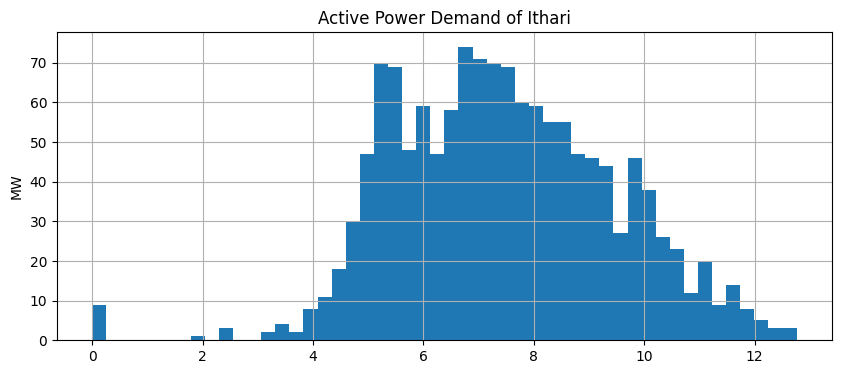

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))
load_data['DHARAN'].plot.hist(ax=ax,bins = 50)
ax.set_title('Active Power Demand of Ithari')
ax.set_ylabel('MW')
ax.grid(True)

Some times it is easier to understand the nature of data in terms of expected values and varience (Standard Deviation)

In [4]:
load_data['DHARAN'].describe()

count    1370.000000
mean        7.448343
std         1.995288
min         0.000000
25%         5.945000
50%         7.340000
75%         8.850000
max        12.760000
Name: DHARAN, dtype: float64

Now, our motto is to try to represent the data in terms of function or distribtuion function. As the load changes are continuous, we can use continuous probablity distribution to fit the data. 

Lets revise some of the distribution functions

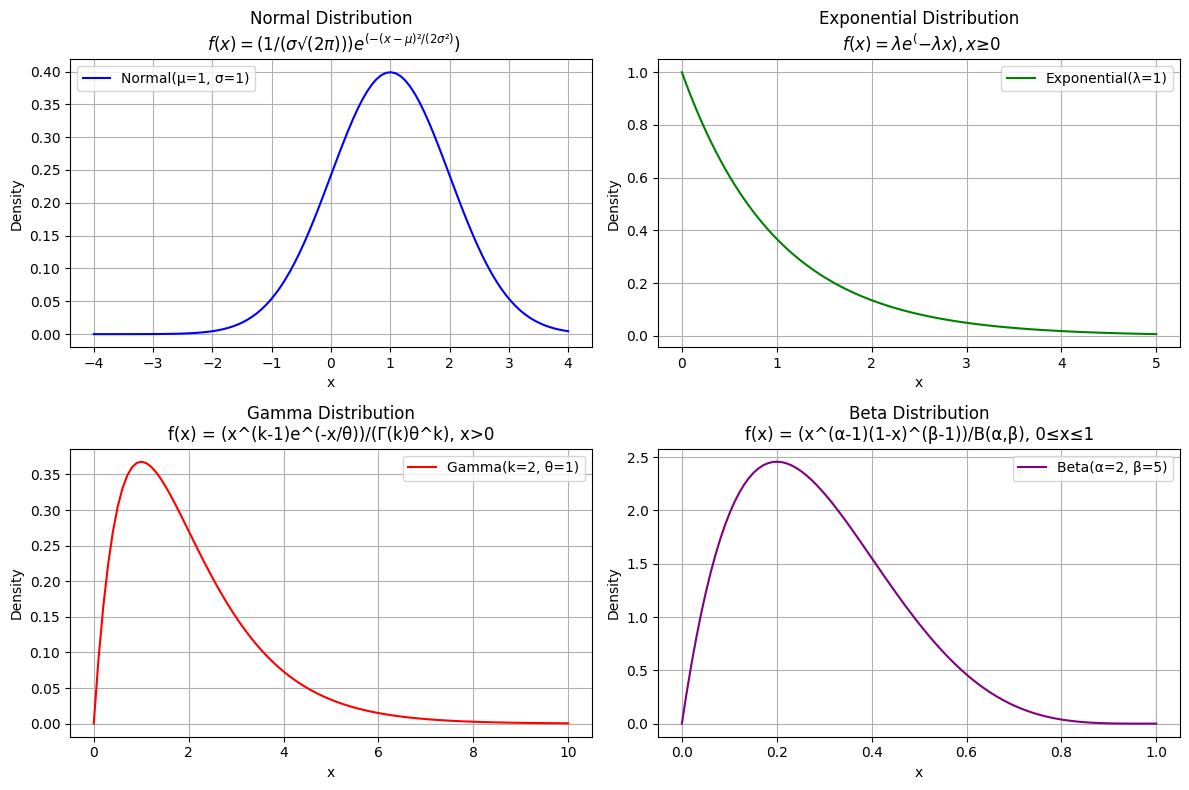

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, gamma, beta

# Set up the figure and subplots
plt.figure(figsize=(12, 8))

# Normal Distribution
x_norm = np.linspace(-4, 4, 100)
mu, sigma = 1, 1  # Mean and standard deviation
y_norm = norm.pdf(x_norm, mu, sigma)
plt.subplot(2, 2, 1)
plt.plot(x_norm, y_norm, label=f'Normal(μ={mu}, σ={sigma})', color='blue')
plt.title('Normal Distribution\n $f(x) = (1/(σ√(2π)))e^{(-(x-μ)²/(2σ²)})$')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Exponential Distribution
x_exp = np.linspace(0, 5, 100)
lambda_exp = 1  # Rate parameter
y_exp = expon.pdf(x_exp, scale=1/lambda_exp)
plt.subplot(2, 2, 2)
plt.plot(x_exp, y_exp, label=f'Exponential(λ={lambda_exp})', color='green')
plt.title('Exponential Distribution\n $f(x) = λe^(-λx), x≥0$')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Gamma Distribution
x_gamma = np.linspace(0, 10, 100)
k, theta = 2, 1  # Shape and scale parameters
y_gamma = gamma.pdf(x_gamma, a=k, scale=theta)
plt.subplot(2, 2, 3)
plt.plot(x_gamma, y_gamma, label=f'Gamma(k={k}, θ={theta})', color='red')
plt.title('Gamma Distribution\nf(x) = (x^(k-1)e^(-x/θ))/(Γ(k)θ^k), x>0')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Beta Distribution
x_beta = np.linspace(0, 1, 100)
alpha_beta, beta_beta = 2, 5  # Shape parameters
y_beta = beta.pdf(x_beta, alpha_beta, beta_beta)
plt.subplot(2, 2, 4)
plt.plot(x_beta, y_beta, label=f'Beta(α={alpha_beta}, β={beta_beta})', color='purple')
plt.title('Beta Distribution\nf(x) = (x^(α-1)(1-x)^(β-1))/B(α,β), 0≤x≤1')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

Now we can fit the stochastic data, if continuous, using any distribution pdf. 
There are even more, though normal distribution are generally used for load modelling.

In order to fit the data in distribution, a technique called as Maximul Likliehood estimation technique can be used. 
We know, that the data can be fitted in any of mentioed Pdf, however, the best fit option can be selected by using Mean square error or Kolmogorov–Smirnov test.

If you are confident to MATLAB you can use distfit function to fit the data in function.

Here in Python we use Fitter Library

In [6]:
#fitting in the distribution
data_to_fit = load_data['DHARAN'].values

from fitter import Fitter
data_fit = data_to_fit
f = Fitter(data_fit,distributions=['gamma',
                          'lognorm',
                          "beta",
                          "norm"])
f.fit()

In [7]:
best_fit = f.get_best(method = 'sumsquare_error')
print(best_fit)

{'gamma': {'a': 2676.7760878464005, 'loc': -95.90496753260157, 'scale': 0.03861060668623583}}


In [8]:
c = best_fit['gamma']['a']
loc = best_fit['gamma']['loc']
scale = best_fit['gamma']['scale']

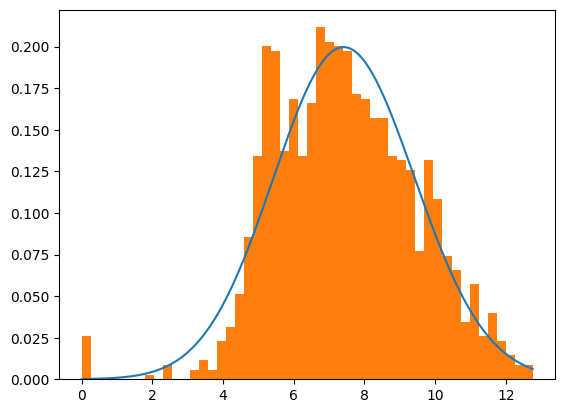

In [9]:
x = np.linspace(min(data_to_fit),max(data_to_fit),1000)
load_pdf = gamma.pdf(x,c, loc, scale)

plt.plot(x,load_pdf)
plt.hist(data_fit,bins = 50,density = True)
plt.show()


In [10]:
load_random_dharan = gamma.rvs(c, loc, scale,1400)

Text(0.5, 1.0, 'Acuatal Data')

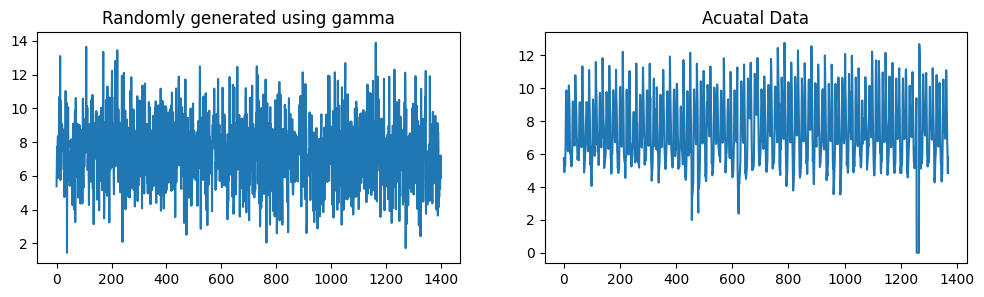

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,3))
ax1.plot(load_random_dharan)
ax1.set_title('Randomly generated using gamma')
ax2.plot(data_to_fit)
ax2.set_title('Acuatal Data')

#### Lets review some of the concepts of load flow

It is basically obtaining the system states and power flow by solving system of non linear equations called as power flow equations:

$$P_i = V_i \sum_{j = 1}^N V_j Y_{ij} cos(\theta_{ij} + \delta_j - \delta_i)$$
$$Q_i = V_i \sum_{j = 1}^N V_j Y_{ij} sin(\theta_{ij} + \delta_j - \delta_i)$$

To solve the equation we generally use G-S method or N-R method. Due to several advantages we use NR method that represent the system of equation in terms of:

$$ \Delta [P,Q] = J \Delta [\delta, V]  $$

$$\Delta [\delta, V] = J^{-1} \Delta [P,Q] $$

In the context of PLF, the power (load or generation), some or multiple are represented by PDFs. Our concern is to obtain the pdf/cdf of any other state of power system. 

It can be done in two ways (discussed here)
    a. Cummulant method
    b. Monte-Carlo Simulation



### First lets learn to run basic power flow in Python 

##### Data Representation

Here, I have use matpower format of data representation. You can use any tools such as matpower, etap or digsilent to develop model and running power flow.

In [12]:
import numpy as np
import cmath

# Base MVA (system base apparent power in MVA)
baseMVA = 100

# Bus data
# Columns: bus_i, type, Pd (MW), Qd (MVar), Gs, Bs, area, Vm (p.u.), Va (degrees), baseKV, zone, Vmax (p.u.), Vmin (p.u.)
bus = np.array([
    [1, 3, 50, 30.99, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],    # Bus 1: Slack bus
    [2, 1, 170, 105.35, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],   # Bus 2: PQ bus
    [3, 1, 200, 123.94, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],   # Bus 3: PQ bus
    [4, 2, 80, 49.58, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],     # Bus 4: PV bus
])

# Generator data
# Columns: bus, Pg (MW), Qg (MVar), Qmax (MVar), Qmin (MVar), Vg (p.u.), mBase (MVA), status, Pmax (MW), Pmin (MW), 
#          Pc1, Pc2, Qc1min, Qc1max, Qc2min, Qc2max, ramp_agc, ramp_10, ramp_30, ramp_q, apf
gen = np.array([
    [4, 318, 0, 100, -100, 1.02, 100, 1, 318, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Generator at bus 4
    [1, 0, 0, 100, -100, 1, 100, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],        # Generator at bus 1 (slack, no active power)
])

# Branch data
# Columns: fbus, tbus, r (p.u.), x (p.u.), b (p.u.), rateA (MVA), rateB (MVA), rateC (MVA), ratio, angle, status, angmin (degrees), angmax (degrees)
branch = np.array([
    [1, 2, 0.01008, 0.0504, 0.1025, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 1 to 2
    [1, 3, 0.00744, 0.0372, 0.0775, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 1 to 3
    [2, 4, 0.00744, 0.0372, 0.0775, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 2 to 4
    [3, 4, 0.01272, 0.0636, 0.1275, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 3 to 4
])

# System parameters
baseMVA = 100
nbus = bus.shape[0]
slack_bus = np.where(bus[:, 1] == 3)[0][0] + 1

# Convert to per-unit
Pd_pu = bus[:, 2] / baseMVA
Qd_pu = bus[:, 3] / baseMVA
Pg_pu = np.zeros(nbus)
Qg_pu = np.zeros(nbus)
for g in gen:
    bus_idx = int(g[0]) - 1
    Pg_pu[bus_idx] += g[1] / baseMVA
    Qg_pu[bus_idx] += g[2] / baseMVA


In [13]:
from Load_Flow_Program import newton_raphson

V, S_inj, J = newton_raphson(nbus,bus, gen, branch,Pg_pu,Qg_pu,Pd_pu,Qd_pu)

Converged after 7 iterations


In [14]:
print("\nBus Voltages (Deterministic):")
for i in range(nbus):
    print(f"Bus {i+1}: {abs(V[i]):.4f} ∠ {np.degrees(np.angle(V[i])):.2f}°")
print("\nPower Injections (pu):")
for i in range(nbus):
    print(f"Bus {i+1}: P = {S_inj[i].real:.4f}, Q = {S_inj[i].imag:.4f}")



Bus Voltages (Deterministic):
Bus 1: 1.0000 ∠ 0.00°
Bus 2: 0.9824 ∠ -0.98°
Bus 3: 0.9690 ∠ -1.87°
Bus 4: 1.0200 ∠ 1.52°

Power Injections (pu):
Bus 1: P = -0.5000, Q = -0.3099
Bus 2: P = -1.7000, Q = -1.0535
Bus 3: P = -2.0000, Q = -1.2394
Bus 4: P = 2.3800, Q = -0.4958


Now what we want to do is to apply stochastic load in bus 2 and try to observe how the voltage at Bus 2 will look like. You can use multiple location too. 
We can use two method as already mentioned. Now lets discuss about cummulant method.

Basically, I wanted to estimate the pdf of random variable $V_2$ from random variable of $P_2,Q_2$ or even more. Mathematically, we can write the output random variable (Z) whose pdf is $\phi(z)$ in terms of input random varaible (X) and (Y) whose pdf are $f_1(x)$ and $f_2(x)$ as:

$$Z = X+Y$$

Here, X and Y are independent. Now, if we want to write the probablity distribution function of Z in terms of X and Y, it would be:

$$\phi(z) = f_1(x)*f_2(x)$$

$$\phi(z) = \int_{-\infty}^{\infty} f_1(x)f_2(z-x) dx$$ 

i.e. convolution (this is one of the method too for PLF, check for your reference)

However, there is another tools that we can use to avoid tedious convolutoin method called as methods of cummulants. 
For a while I wanted to introduce intresting property of cummulants.

In above condition $Z = X+Y$, if we know the cummulants of X and Y then we can obtain the cummulant of Z as:

$$\kappa^n(z) = \kappa^n(X) + \kappa^n(Y) $$

So you can use simple linearity priciple of cummulants to determine the output's cummulant. 
Once you obtain the cummulants, you can generate the PDF of Z by using Gram Charlier Expansion. 



The mean and variance from distribuion function $f(x)$ can be obtained as for range $[a,b]$: 
$$\mu  = EX[x]= \int_{a}^b xf(x)d(x)$$

$$VAR  =  \int_{a}^b (x-\mu)^2f(x)d(x)$$

$$\sigma = \sqrt{VAR}$$
This is also called as central moments $\mu_n$

$n^{th}$ raw moment of the probablity distribution function is givne as:

$$\mu'_n = \int_{-\infty}^{\infty}x^nf(x)dx$$

Let $\phi(t)$ be the characteristis function, defined as the Fourier transform of the probablity density function $f(x)$:

$$\phi(t) = F_x[f(x)](t)$$
$$ = \int_{-\infty}^{\infty}e^{itx}f(x)dx $$
The cummulants $k_n$ are then defined by

$$ln (\phi(t)) = \sum_{n=1}^\infty k_n \frac{(it)^n}{n!} $$
Expanding and comapring the both sides
we will get the cummulants as follows:

\begin{aligned}\kappa _{1}={}&\mu '_{1}\\[4pt]\kappa _{2}={}&\mu '_{2}-{\mu '_{1}}^{2}\\[4pt]\kappa _{3}={}&\mu '_{3}-3\mu '_{2}\mu '_{1}+2{\mu '_{1}}^{3}\\[4pt]\kappa _{4}={}&\mu '_{4}-4\mu '_{3}\mu '_{1}-3{\mu '_{2}}^{2}+12\mu '_{2}{\mu '_{1}}^{2}-6{\mu '_{1}}^{4}\\[4pt]\kappa _{5}={}&\mu '_{5}-5\mu '_{4}\mu '_{1}-10\mu '_{3}\mu '_{2}+20\mu '_{3}{\mu '_{1}}^{2}+30{\mu '_{2}}^{2}\mu '_{1}-60\mu '_{2}{\mu '_{1}}^{3}+24{\mu '_{1}}^{5}\\[4pt]\kappa _{6}={}&\mu '_{6}-6\mu '_{5}\mu '_{1}-15\mu '_{4}\mu '_{2}+30\mu '_{4}{\mu '_{1}}^{2}-10{\mu '_{3}}^{2}+120\mu '_{3}\mu '_{2}\mu '_{1}\\&{}-120\mu '_{3}{\mu '_{1}}^{3}+30{\mu '_{2}}^{3}-270{\mu '_{2}}^{2}{\mu '_{1}}^{2}+360\mu '_{2}{\mu '_{1}}^{4}-120{\mu '_{1}}^{6}\end{aligned}


Now we can approximate the distribution function that has the cumulants with the help of expansion such as gram-charlier expansion, edgeworth expansion and so on:
The approximate gram-charlier expansion can be written as:

$$ f(x)\approx {\frac {1}{{\sqrt {2\pi }}\sigma }}\exp \left[-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right]\left[1+{\frac {\kappa _{3}}{3!\sigma ^{3}}}He_{3}\left({\frac {x-\mu }{\sigma }}\right)+{\frac {\kappa _{4}}{4!\sigma ^{4}}}He_{4}\left({\frac {x-\mu }{\sigma }}\right)\right]\,,$$

The $He_{i}(x)$ is Hermite polynomial and for fourth order can be given as:
$$He_{3}(x)=x^{3}-3x$$
$$He_{4}(x)=x^{4}-6x^{2}+3$$
and $\mu = \kappa_1$ is the mean of the distribution and $\sigma = \sqrt{\kappa_2}$

##### Lets determing cummulants of our gamma distribution of load




In [15]:
dist = gamma(c, loc, scale)
u1,u2,u3,u4,u5,u6 = dist.moment(1),dist.moment(2),dist.moment(3),dist.moment(4),dist.moment(5),dist.moment(6)

In [16]:
def cumulants_from_moments(u1,u2,u3,u4,u5,u6):
  k1 = u1
  k2 = u2-u1**2
  k3 = u3-3*u1*u2 + 2*u1**3
  k4 = u4 - 4*u3*u1 - 3*u2**2 + 12* u2*u1**2 - 6*u1**4
  k5 = u5 - 5*u4*u1 - 10*u3*u2 + 20*u3*u1**2 + 30*u2**2*u1 - 60 * u2*u1**3 + 24*u1**5
  k6 = u6 - 6*u5*u1 - 15*u4*u2 + 30*u4*u1**2 - 10*u3**2 + 120*u3*u2*u1 - 120*u3*u1**3 + 30*u2**3 - 270*u2**2*u1**2 + 360*u2*u1**4 - 120*u1**6
  return (k1,k2,k3,k4,k5,k6)

k1, k2, k3, k4,k5,k6 = cumulants_from_moments(u1,u2,u3,u4,u5,u6)
print(k1,k2,k3,k4,k5,k6)

7.446981182356847 3.990481442087429 0.30814981861283286 0.03569358079039375 0.00630817178171128 -37.05131287500262


In [17]:
# Gram-Charlier Expansion
z = (x - k1) / np.sqrt(k2)
phi = norm.pdf(z)
H3 = z**3 - 3*z
H4 = z**4 - 6*z**2 + 3
f_gc = phi * (1 + (k3 / (6 * k2**1.5)) * H3 + (k4 / (24 * k2**2)) * H4) / np.sqrt(k2)


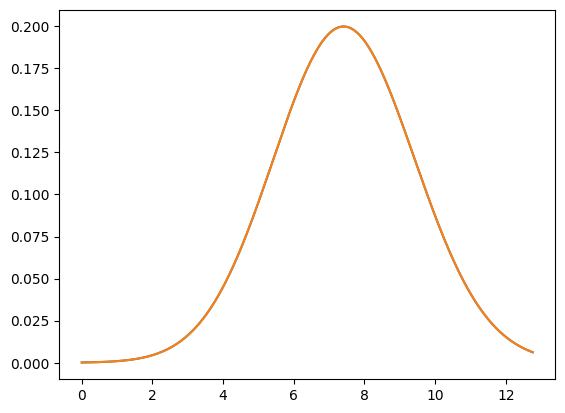

In [18]:
plt.plot(x,f_gc)
plt.plot(x,load_pdf)

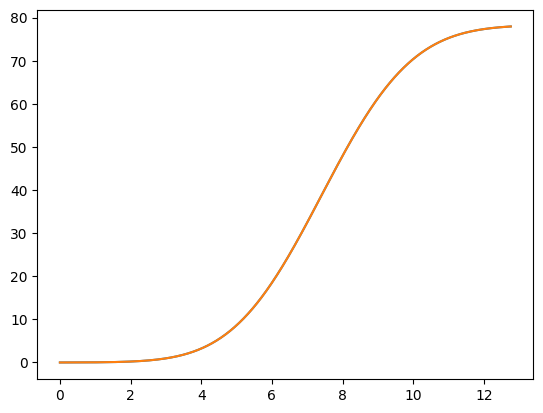

In [19]:
plt.plot(x,f_gc.cumsum())
plt.plot(x,load_pdf.cumsum())

### Some other properties of cummulants

a. if n>1 and c is constan then, $\kappa_n (X+c) = \kappa_n(X)$ and for n=1 $\kappa_n(cX) = c^n\kappa_n(X)$

b. $\kappa_n(cX) = c^n\kappa_n(X)$

c. $\kappa_n(X_1 + X_2 ... + X_m) = \kappa_n(X_1) + \kappa_n(X_2) + ...... \kappa_n(X_m)$

### Linear power flow equations for cummunant propagation

I want to obtain the probablity distribution function of $V_2$ for the probablistic load demand at bus 2 $P_2$ and $Q_2$. The basis steps to find the distribution is to first represent $V_2$ in terms of $P_2$ and $Q_2$. Here, we assume linear relationship between the input and output variables:

$$V_2 = S_1 P_2 + S_2 Q_2$$

We can obtain the cummulant of $P_2$ and $Q_2$ using moments of the distribution fitted to the active and reactive load demand. 
Using the linear property of Cummulants, we also obtain the cummulant os $V_2$ as:

$$\kappa_{v_2}^n = S_1^n \kappa_{P_2}^n + S_2^n \kappa_{Q_2}^n$$

After getting the cummulants of $V_2$. We will get the pdf of $V_2$ using gram charlier expansion as mentioned above.

Now, the equestion is what is $S_i$ i.e. $S_1$ and $S_2$, they are called sensitivity. 

$$S_1 = \frac{\Delta V_2}{\Delta P_2}, S_2 = \frac{\Delta V_2}{\Delta Q_2} $$

Now, there are two ways to calculate sensitivity, one is:
a. simply perform power flow twice and note the changes and take the ratio. 
b. obtain the steady (after iteration or convergence dies) Jacobian and look at the appropriate matrix values.



In [20]:
import numpy as np
import cmath

# Base MVA (system base apparent power in MVA)
baseMVA = 100

# Bus data
# Columns: bus_i, type, Pd (MW), Qd (MVar), Gs, Bs, area, Vm (p.u.), Va (degrees), baseKV, zone, Vmax (p.u.), Vmin (p.u.)
bus = np.array([
    [1, 3, 50, 30.99, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],    # Bus 1: Slack bus
    [2, 1, 170, 105.35, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],   # Bus 2: PQ bus
    [3, 1, 200, 123.94, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],   # Bus 3: PQ bus
    [4, 2, 80, 49.58, 0, 0, 1, 1, 0, 230, 1, 1.1, 0.9],     # Bus 4: PV bus
])

# Generator data
# Columns: bus, Pg (MW), Qg (MVar), Qmax (MVar), Qmin (MVar), Vg (p.u.), mBase (MVA), status, Pmax (MW), Pmin (MW), 
#          Pc1, Pc2, Qc1min, Qc1max, Qc2min, Qc2max, ramp_agc, ramp_10, ramp_30, ramp_q, apf
gen = np.array([
    [4, 318, 0, 100, -100, 1.02, 100, 1, 318, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Generator at bus 4
    [1, 0, 0, 100, -100, 1, 100, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],        # Generator at bus 1 (slack, no active power)
])

# Branch data
# Columns: fbus, tbus, r (p.u.), x (p.u.), b (p.u.), rateA (MVA), rateB (MVA), rateC (MVA), ratio, angle, status, angmin (degrees), angmax (degrees)
branch = np.array([
    [1, 2, 0.01008, 0.0504, 0.1025, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 1 to 2
    [1, 3, 0.00744, 0.0372, 0.0775, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 1 to 3
    [2, 4, 0.00744, 0.0372, 0.0775, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 2 to 4
    [3, 4, 0.01272, 0.0636, 0.1275, 250, 250, 250, 0, 0, 1, -360, 360],  # Line from bus 3 to 4
])

# System parameters
baseMVA = 100
nbus = bus.shape[0]
slack_bus = np.where(bus[:, 1] == 3)[0][0] + 1

# Convert to per-unit
Pd_pu = bus[:, 2] / baseMVA
Qd_pu = bus[:, 3] / baseMVA
Pg_pu = np.zeros(nbus)
Qg_pu = np.zeros(nbus)
for g in gen:
    bus_idx = int(g[0]) - 1
    Pg_pu[bus_idx] += g[1] / baseMVA
    Qg_pu[bus_idx] += g[2] / baseMVA

# Input uncertainties (normal distribution for Bus 2 load)
mu_P2 = Pd_pu[1]  # 1.7 pu
sigma_P2 = 0.2 * mu_P2  # 20% of mean
mu_Q2 = Qd_pu[1]  # 1.053 pu
sigma_Q2 = 0.2 * mu_Q2

# Cumulants for normal distribution (only first two are non-zero)
kappa_P2 = [mu_P2, sigma_P2**2]  # [mean, variance]
kappa_Q2 = [mu_Q2, sigma_Q2**2]

In [21]:
from Load_Flow_Program import newton_raphson

In [22]:
V, S_inj, J = newton_raphson(nbus,bus, gen, branch,Pg_pu,Qg_pu,Pd_pu,Qd_pu)

Converged after 7 iterations


In [23]:
abs(V[1])

0.982418887962726

In [24]:
(1.012-0.9922)/(4)

0.00495000000000001

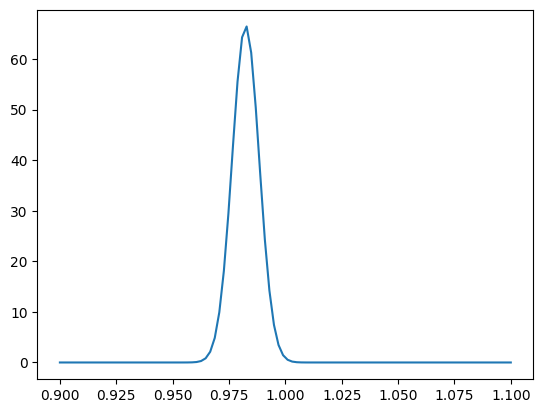

In [25]:
v_range = np.linspace(0.9, 1.1, 100)   # For voltages (pu)
# Gram-Charlier PDF
def gram_charlier_pdf(x,k1,k2):
    std = np.sqrt(k2)
    z = (x - k1) / std
    #phi = norm.pdf(z)
    pdf = norm.pdf(z) / std
    return pdf

v2pdf = gram_charlier_pdf(v_range,0.9824,0.0000359)

plt.plot(v_range,v2pdf)
#plt.plot(v_range,v2pdf.cumsum())

### Monte Carlo Simulation

In [26]:
# Monte Carlo simulation
def monte_carlo_simulation(bus, gen, branch, n_samples=1000):    
    # Generate random samples for P_d2 and Q_d2
    P_d2_samples = np.random.normal(mu_P2, sigma_P2, n_samples)
    Q_d2_samples = np.random.normal(mu_Q2, sigma_Q2, n_samples)
    
    V2 = [] #storing results of V2

    for i in range(n_samples):
        # Update load at Bus 2
        Pd_pu_mc = Pd_pu.copy()
        Qd_pu_mc = Qd_pu.copy()
        Pd_pu_mc[1] = P_d2_samples[i]
        Qd_pu_mc[1] = Q_d2_samples[i]
        
        # Run deterministic power flow
        V, S_inj,J = newton_raphson(nbus,bus, gen, branch,Pg_pu,Qg_pu, Pd_pu_mc, Qd_pu_mc)
       
        V2.append(V[1]) 

    return V2


In [27]:
V2 = monte_carlo_simulation(bus, gen, branch, n_samples=10000)

Converged after 7 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged afte

In [28]:
V2_mag = abs(np.array(V2))

(array([  1.,   1.,   1.,   1.,   4.,   0.,   1.,   5.,   3.,   6.,  10.,
          6.,   7.,  15.,  16.,  15.,  24.,  29.,  28.,  35.,  49.,  64.,
         55.,  61.,  98.,  93., 106., 129., 146., 143., 160., 191., 226.,
        230., 239., 299., 270., 298., 286., 292., 312., 352., 333., 331.,
        304., 354., 343., 298., 341., 295., 277., 278., 251., 251., 243.,
        221., 190., 170., 148., 173., 128., 112., 103.,  91.,  86.,  65.,
         60.,  55.,  40.,  31.,  20.,  19.,  22.,  13.,   5.,  13.,  10.,
          2.,   5.,   4.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.]),
 array([0.9637308 , 0.96415286, 0.96457492, 0.96499698, 0.96541904,
        0.96584109, 0.96626315, 0.96668521, 0.96710727, 0.96752933,
        0.96795139, 0.96837345, 0.96879551, 0.96921757, 0.96963963,
        0.97006169, 0.97048375, 0.97090581, 0.97132786, 0.97174992,
        0.97217198, 0.97259404, 0.9730161 , 0.97343816, 0.97386022,
        0.97428228, 0.97470434, 0.9751264 , 0.

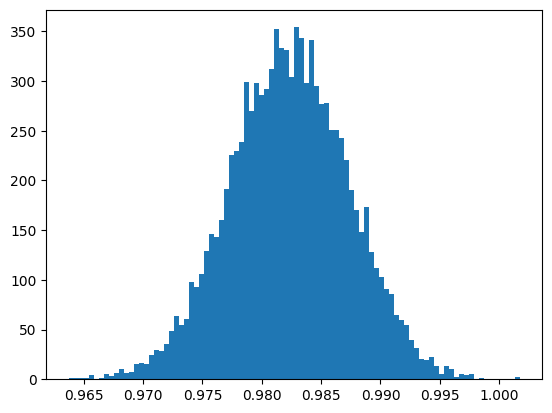

In [29]:
plt.hist(V2_mag,bins = 90)

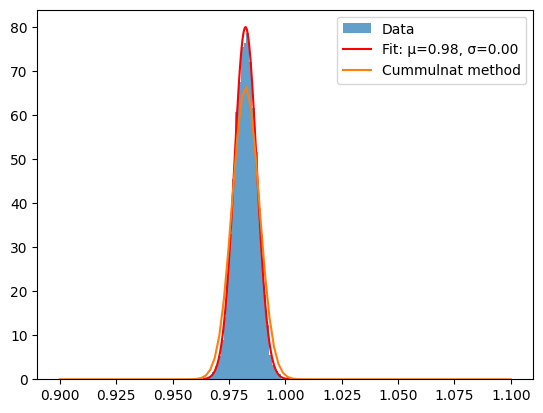

In [32]:
from scipy import stats
mu, sigma = stats.norm.fit(V2_mag)
plt.hist(V2_mag, bins=30, density=True, alpha=0.7, label='Data')

# Plot fitted distribution
x = np.linspace(min(V2_mag), max(V2_mag), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}')
plt.plot(v_range,v2pdf,label='Cummulnat method')
plt.legend()
plt.show()